# Training StyleGAN - MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 32
LR = 5e-5
NUM_EPOCHES = 50
CRIT_REPEATS = 5

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.Resize((16,16),interpolation=Image.NEAREST),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
trainset = datasets.MNIST('../../data/MNIST/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## Model

In [7]:
from gans_package.models import StyleGAN_Generator, StyleGAN_Discriminator_16x16

In [8]:
in_channels = 128
out_channels = 1
hidden_channels = 512
z_dim = 64
mapping_hidden_size = 128
w_dim = 256
synthesis_layers = 3
mapping_layers = 4
kernel_size=3

in_size = 1
d_hidden_size = 16

g = StyleGAN_Generator(in_channels, out_channels, hidden_channels, z_dim, mapping_hidden_size, w_dim, synthesis_layers, mapping_layers, kernel_size, device=DEVICE).to(DEVICE)
d = StyleGAN_Discriminator_16x16(in_size, d_hidden_size).to(DEVICE)
print(g)
print(d)

from utils.model import weights_init 

g = g.apply(weights_init)
d = d.apply(weights_init)

StyleGAN_Generator(
  (mapping_network): MappingNetwork(
    (mapping_network): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=64, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (2): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (3): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (4): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (5): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (6): Linear(in_features=128, out_features=256, bias=True)
    )
  )
  (synthesis_network): ModuleList(
    (0): SynthesisNetwork_Block(
      (injectnoise): InjectNoise()
      (convolution): Conv2d(12

In [9]:
for index, (real, _) in enumerate(trainloader):
    real = real.to(DEVICE)
    noise = torch.randn(real.size(0), z_dim).to(DEVICE)
    
    print("Input Image Dimensions: {}".format(real.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([32, 1, 16, 16])
Noise Dimensions: torch.Size([32, 64])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([32, 1, 16, 16])
Prediction Output Dimensions: torch.Size([32, 1])


C:\Users\Udbhav Prasad\anaconda3\lib\site-packages\torch\nn\functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


## Training

In [10]:
from Loss_F.loss import W_Crit_Loss, W_Gen_Loss

w_crit_loss = W_Crit_Loss(10)
w_gen_loss = W_Gen_Loss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR, betas=(0.5, 0.999))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1: Generator Loss: -0.7208584173702014; Discriminator Loss: 8.285534104817724


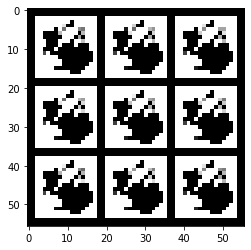

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 2: Generator Loss: -1.7838046776490908; Discriminator Loss: 6.689677580273938


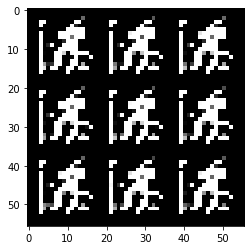

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 3: Generator Loss: -2.305921009978652; Discriminator Loss: 0.5644415247567541


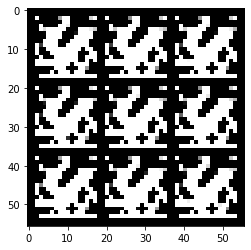

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 4: Generator Loss: -10.150306974865993; Discriminator Loss: 2.5296785106992714


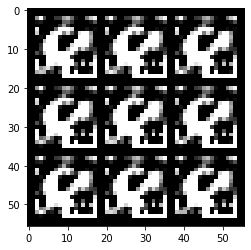

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5: Generator Loss: -8.009189486504098; Discriminator Loss: -4.890884035010335


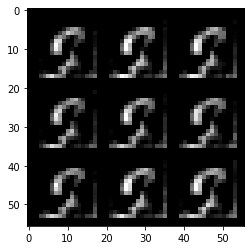

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 6: Generator Loss: -3.607020136701564; Discriminator Loss: -21.239217282765754


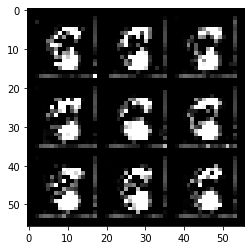

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 7: Generator Loss: -2.0671854313254356; Discriminator Loss: -49.427834363098164


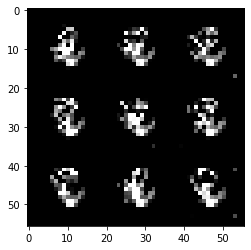

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 8: Generator Loss: -3.352080055650075; Discriminator Loss: -75.8111313911946


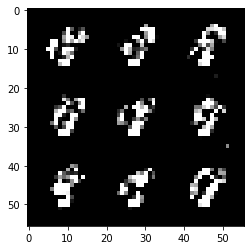

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 9: Generator Loss: -14.352863675975799; Discriminator Loss: -75.3075930052695


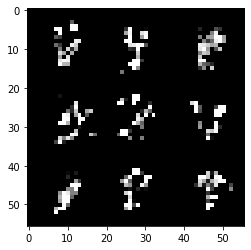

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10: Generator Loss: -22.76833770837784; Discriminator Loss: -83.97411949022931


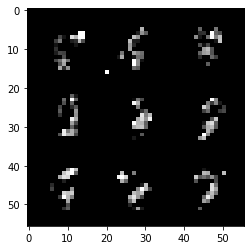

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 11: Generator Loss: -31.47929790868759; Discriminator Loss: -115.99498840464273


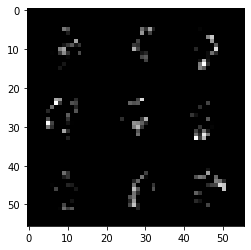

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 12: Generator Loss: -40.738719403012595; Discriminator Loss: -170.74992173665362


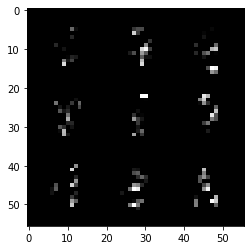

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 13: Generator Loss: -48.97029975026449; Discriminator Loss: -243.0810427078248


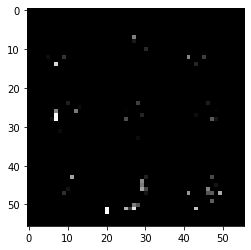

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 14: Generator Loss: -51.135592858759566; Discriminator Loss: -323.22947535736057


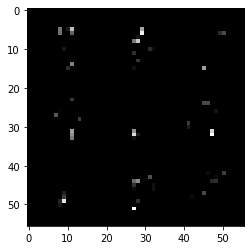

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15: Generator Loss: -57.238597181447346; Discriminator Loss: -409.03884118459075


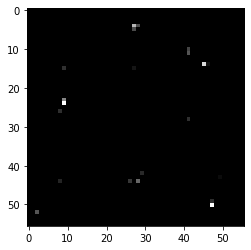

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 16: Generator Loss: -63.903006301561994; Discriminator Loss: -502.58252730305946


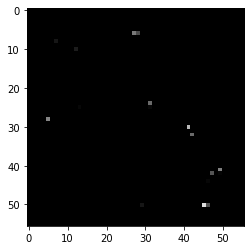

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 17: Generator Loss: -74.48729505475362; Discriminator Loss: -584.6447321114097


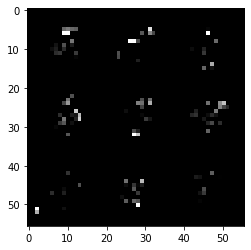

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 18: Generator Loss: -99.1206198483785; Discriminator Loss: -633.0237930438234


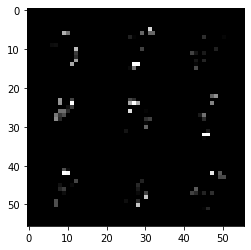

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 19: Generator Loss: -127.56098357766469; Discriminator Loss: -666.4220003979507


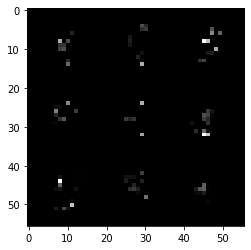

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20: Generator Loss: -152.679685761261; Discriminator Loss: -647.9871000661227


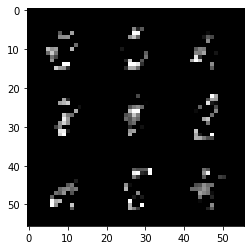

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 21: Generator Loss: -178.11035915120442; Discriminator Loss: -583.1655226100667


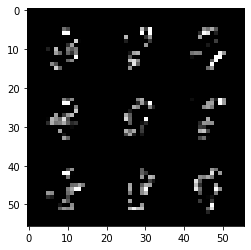

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 22: Generator Loss: -206.8727269744873; Discriminator Loss: -442.6466488155114


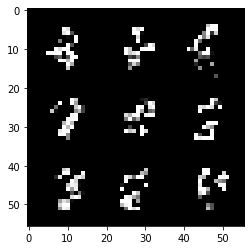

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 23: Generator Loss: -224.82421368865965; Discriminator Loss: -345.96558085367855


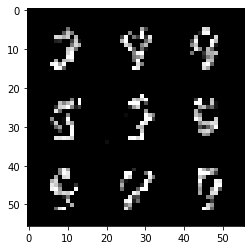

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 24: Generator Loss: -210.80201842575073; Discriminator Loss: -314.8938155444339


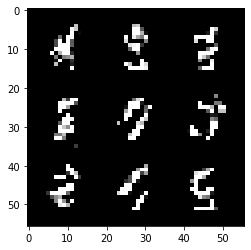

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25: Generator Loss: -225.14642598470053; Discriminator Loss: -376.436610634359


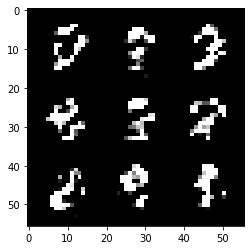

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 26: Generator Loss: -231.75576890335083; Discriminator Loss: -550.2901930497228


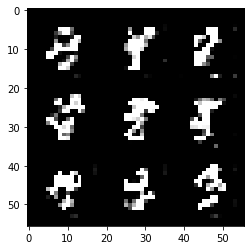

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 27: Generator Loss: -234.37919653930663; Discriminator Loss: -683.021697994588


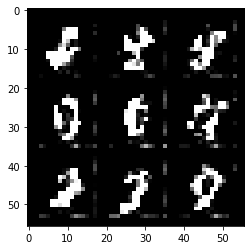

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 28: Generator Loss: -239.33232647450765; Discriminator Loss: -770.3977150939934


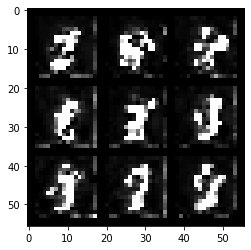

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 29: Generator Loss: -253.92906523691812; Discriminator Loss: -835.049744363201


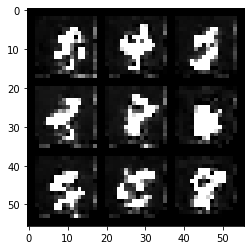

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30: Generator Loss: -272.5407672236125; Discriminator Loss: -876.5315654587815


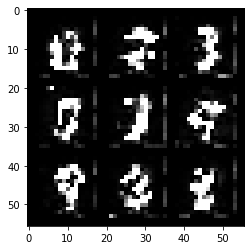

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 31: Generator Loss: -301.3097394747416; Discriminator Loss: -880.5086417818205


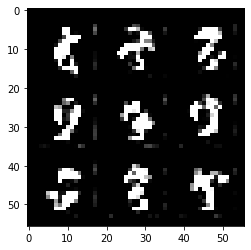

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 32: Generator Loss: -347.01507542978925; Discriminator Loss: -770.8445634824612


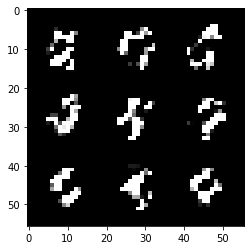

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 33: Generator Loss: -377.1873502421061; Discriminator Loss: -557.5263057629389


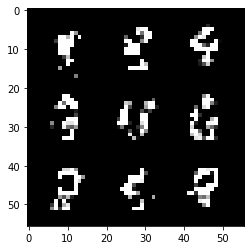

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 34: Generator Loss: -383.00884244181316; Discriminator Loss: -561.8890963354487


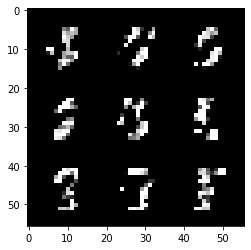

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35: Generator Loss: -357.0016321528117; Discriminator Loss: -658.8438770572931


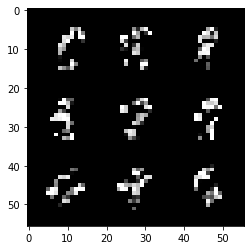

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 36: Generator Loss: -359.64037969767253; Discriminator Loss: -827.6692295373523


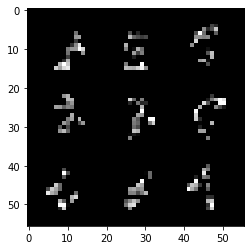

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 37: Generator Loss: -371.3004961677551; Discriminator Loss: -950.1693228338627


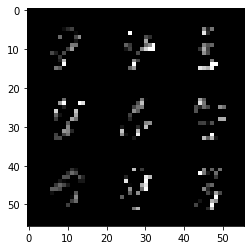

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 38: Generator Loss: -394.63822256520587; Discriminator Loss: -1043.0644294125373


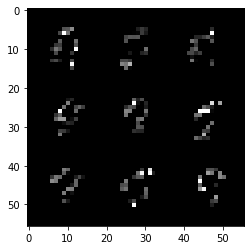

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 39: Generator Loss: -427.30304893544513; Discriminator Loss: -1153.9211973832203


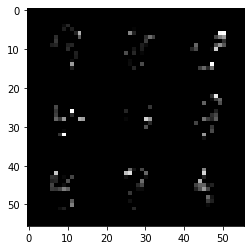

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40: Generator Loss: -456.5339746734619; Discriminator Loss: -1282.68833626648


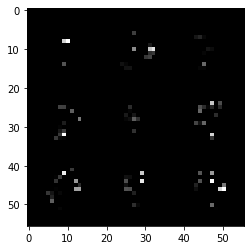

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 41: Generator Loss: -485.2514673065186; Discriminator Loss: -1392.346186510824


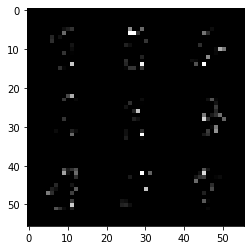

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 42: Generator Loss: -526.2928054850261; Discriminator Loss: -1490.4661592651353


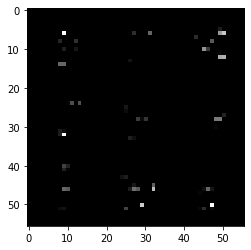

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 43: Generator Loss: -557.1741887908936; Discriminator Loss: -1555.5932918851718


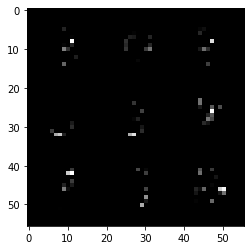

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 44: Generator Loss: -608.4445431711832; Discriminator Loss: -1602.2547895524085


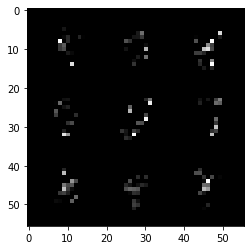

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45: Generator Loss: -655.4539572860717; Discriminator Loss: -1652.6530857698594


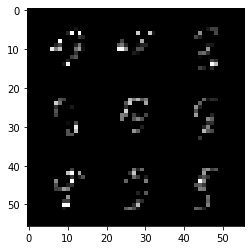

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 46: Generator Loss: -709.607323500061; Discriminator Loss: -1661.162847917481


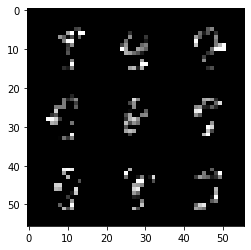

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 47: Generator Loss: -745.0156292744955; Discriminator Loss: -1610.1208730647807


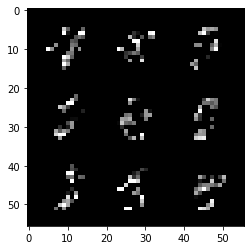

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 48: Generator Loss: -777.5366207519531; Discriminator Loss: -1555.3797967175262


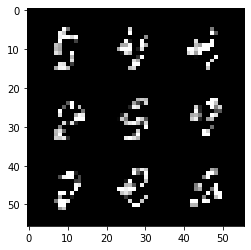

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 49: Generator Loss: -815.599046568807; Discriminator Loss: -1382.3746523177097


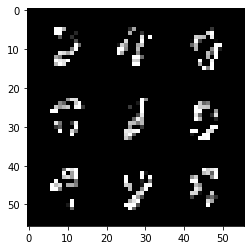

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50: Generator Loss: -841.5711595540365; Discriminator Loss: -1129.4236587695343


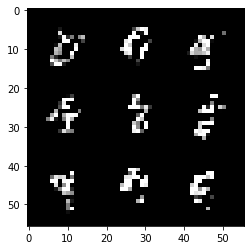

In [11]:
from utils.train import Wasserstein_Crit_Train

loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    g.train()
    d.train()
    
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    for index, (real, _) in enumerate(trainloader):
        b = real.size(0)
        real = real.to(DEVICE)
        
        loss = Wasserstein_Crit_Train(d, g, d_optimizer, w_crit_loss, CRIT_REPEATS, real, z_dim, device=DEVICE)
        epoch_d_loss += loss
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, z_dim).to(DEVICE)
        fake = g(noise)
        pred = d(fake)
        
        g_loss = w_gen_loss(pred)
        g_loss.backward()
        epoch_g_loss += g_loss.item()
        g_optimizer.step()
        
    epoch_g_loss /= len(trainloader)
    epoch_d_loss /= len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))
    
    g.eval()
    noise = torch.randn(b, z_dim).to(DEVICE)
    fake = g(noise)
    
    images = fake.detach().to("cpu")
    images_grid = make_grid(images[:9], nrow=3)
    plt.imshow(images_grid.permute(1, 2, 0).squeeze())
    plt.show()